# Exercício 1

**Nome:** Angela Crepaldi

In [1]:
# Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Caminho para Exercício 1

import os
ex1_path = os.getcwd()

# 1. Manipulando arrays

1. Escreva uma função do Python que implementa a [similaridade do cosseno](https://en.wikipedia.org/wiki/Cosine_similarity) (eq. A.7 do Watt) entre dois vetores, definida por

$$
{\rm cosine\_similarity(\boldsymbol{x},\boldsymbol{y})} = \frac{\boldsymbol{x}^T \boldsymbol{y}}{\|\boldsymbol{x}\|\|\boldsymbol{y}\|}
$$

In [3]:
# Solução

def cosine_similarity(x,y):
    s = (np.transpose(x) @ y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return s

# Testes
x = np.array([1,2,3,4])
y = np.array([2,2,2,2])
z = np.array([2,-2,2,-2])
print(cosine_similarity(x,y)) # = 0.9128709291752769
print(cosine_similarity(x,z)) # = -0.18257418583505536

0.9128709291752769
-0.18257418583505536


2. Calcule os produtos $\bA^T\bB$ e $\bB \bA^T$, onde
$$\bA = \mat{1 & 2 \\ 3 & 4 \\ 5 & 6} \qquad \bB = \mat{1 & 1 \\ 1 & 1 \\ 1 & 1}$$

In [4]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [5]:
B = np.ones((3, 2))
B

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [6]:
np.transpose(A) @ B

array([[ 9.,  9.],
       [12., 12.]])

In [7]:
np.transpose(B) @ A

array([[ 9., 12.],
       [ 9., 12.]])

3. Considere os vetores abaixo.

In [8]:
A = np.array([[1,0,1],[0,1,0],[1,1,1]])
A

array([[1, 0, 1],
       [0, 1, 0],
       [1, 1, 1]])

In [9]:
b = np.array([1,2,3])
b

array([1, 2, 3])

Explique o porquê do resultado abaixo.

In [10]:
np.all(b*A == A*b)

True

Resposta:

A função np.all() testa se todos os elementos da matriz são verdadeiros, neste caso, a matriz é o resultado da comparação entre $b*A$ e $A*b$ cujos elementos correspondentes são iguais. 

A operação $*$ no python faz uma multiplicação elemento a elemento. Para ser uma multiplicação entre arrays, é necessário utilizar o produto interno, np.dot(A, b), ou o operador @.

In [11]:
b*A

array([[1, 0, 3],
       [0, 2, 0],
       [1, 2, 3]])

In [12]:
A*b

array([[1, 0, 3],
       [0, 2, 0],
       [1, 2, 3]])

In [13]:
np.dot(A, b)

array([4, 2, 6])

In [14]:
np.dot(b, A)

array([4, 5, 4])

In [15]:
A @ b

array([4, 2, 6])

In [16]:
b @ A

array([4, 5, 4])

# 2. Manipulando dados

1. Baixe o arquivo `bitcoin_price.csv` (**terceiro** arquivo da lista em *Data Sources*) disponível em

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/

e salve-o numa subpasta `data`, i.e., o arquivo estará acessível em `data/bitcoin_price.csv`

2. Carregue o arquivo usando a biblioteca Pandas
3. Trace o gráfico do preço de fechamento ("Close") em função da data para todo o ano de 2017 (365 amostras):
 - usando a função `.plot()` do Pandas
 - convertendo para NumPy e usando Matplotlib

### Dicas

- Siga o notebook fornecido de exemplo do Pandas e/ou qualquer outro tutorial de Pandas (https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [17]:
btc_tbl = pd.read_csv(ex1_path + '/data/bitcoin_price.csv')

In [18]:
btc_tbl.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [19]:
row_1 = btc_tbl[btc_tbl['Date'].isin(['Jan 01, 2017'])]
index1 = row_1.index
i1 = index1.to_numpy()
last = i1[0] + 1
row_2 = btc_tbl[btc_tbl['Date'].isin(['Dec 31, 2017'])]
index2 = row_2.index
i2 = index2.to_numpy()
first = i2[0]
btc_plt = btc_tbl[first:last]

In [20]:
# reverte 
rev_btc = btc_plt.iloc[::-1].reset_index(drop=True)
rev_btc.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jan 01, 2017",963.66,1003.08,958.70,998.33,"147,775,000","15,491,200,000"
1,"Jan 02, 2017",998.62,1031.39,996.70,1021.75,"222,185,000","16,055,100,000"
2,"Jan 03, 2017",1021.60,1044.08,1021.60,1043.84,"185,168,000","16,426,600,000"
3,"Jan 04, 2017",1044.40,1159.42,1044.40,1154.73,"344,946,000","16,795,400,000"
4,"Jan 05, 2017",1156.73,1191.10,910.42,1013.38,"510,199,000","18,604,000,000"


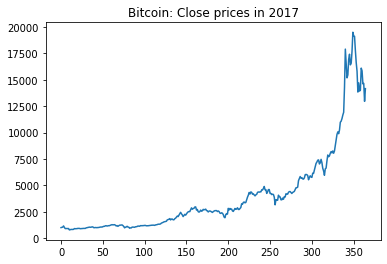

In [21]:
rev_btc["Close"].plot(title="Bitcoin: Close prices in 2017");

In [22]:
# bitcoin_price = pd.read_csv(ex1_path + '/data/bitcoin_price.csv')  #, index_col=0, parse_dates=True)

In [23]:
# bitcoin_price.head(5)

In [24]:
# bitcoin_price["Close"].plot()

In [25]:
# bitcoin_price_test = bitcoin_price.rename(columns={"Date": "datetime"})
# bitcoin_price_test

In [26]:
# bitcoin_price_test["datetime"] = pd.to_datetime(bitcoin_price_test["datetime"])

In [27]:
# tmin = bitcoin_price_test["datetime"].min()
# tmin

In [28]:
# bitcoin_price_test["year"] = bitcoin_price_test["datetime"].dt.year

In [29]:
# bitcoin_price_test.head()

In [30]:
# test = bitcoin_price_test.groupby(bitcoin_price_test["datetime"].dt.year)["Close"].max()

In [31]:
# test

In [32]:
# btc_2017 = bitcoin_price_test.pivot(index="datetime", columns="datetime", values="Close")

In [33]:
# bitcoin_price_2017 = bitcoin_price.iloc[51: 416,:]

In [34]:
# bitcoin_price_2017["Close"].plot()

In [35]:
# New

# bitcoin_price = pd.read_csv(ex1_path + '/data/bitcoin_price.csv', index_col=0, parse_dates=True)

In [36]:
# bitcoin_price

In [37]:

import datetime as dt


In [38]:
# start = bitcoin_price.index.searchsorted(dt.datetime(2017, 1, 1))
# end = bitcoin_price.index.searchsorted(dt.datetime(2017, 12, 31))
# start = bitcoin_price.index.searchsorted("2017-01-01")
# end = bitcoin_price.index.searchsorted("2017-12-31")
# print(f"start = {start}: end = {end}")

In [39]:
# btc_2017 = bitcoin_price['20170101':'20171231']
# btc_2017.head(1)

In [40]:
# bitcoin_price.sort_index('Date')

In [41]:
# Set the Index to be the Date
btc_tbl['Date'] = pd.to_datetime(btc_tbl['Date'], format='%b %d, %Y')
btc_tbl.set_index('Date', inplace=True)



In [42]:
# Sort the Data
btc_tbl = btc_tbl.sort_values('Date')



In [43]:
# Slice the Data
From = '2017-01-01'
To   = '2017-12-31'
df_Z = btc_tbl.loc[From:To,:]
df_Z

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,"147,775,000","15,491,200,000"
2017-01-02,998.62,1031.39,996.70,1021.75,"222,185,000","16,055,100,000"
2017-01-03,1021.60,1044.08,1021.60,1043.84,"185,168,000","16,426,600,000"
2017-01-04,1044.40,1159.42,1044.40,1154.73,"344,946,000","16,795,400,000"
2017-01-05,1156.73,1191.10,910.42,1013.38,"510,199,000","18,604,000,000"
...,...,...,...,...,...,...
2017-12-27,16163.50,16930.90,15114.30,15838.50,"12,487,600,000","270,976,000,000"
2017-12-28,15864.10,15888.40,13937.30,14606.50,"12,336,500,000","265,988,000,000"
2017-12-29,14695.80,15279.00,14307.00,14656.20,"13,025,500,000","246,428,000,000"


In [46]:
# reverte 
rev_df_Z = df_Z.iloc[::-1].reset_index(drop=True)
rev_df_Z.head(5)

,Open,High,Low,Close,Volume,Market Cap
0,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000"
1,14681.9,14681.9,12350.1,12952.2,"14,452,600,000","246,224,000,000"
2,14695.8,15279.0,14307.0,14656.2,"13,025,500,000","246,428,000,000"
3,15864.1,15888.4,13937.3,14606.5,"12,336,500,000","265,988,000,000"
4,16163.5,16930.9,15114.3,15838.5,"12,487,600,000","270,976,000,000"


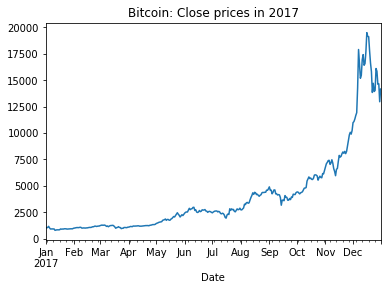

In [47]:
df_Z["Close"].plot(title="Bitcoin: Close prices in 2017");